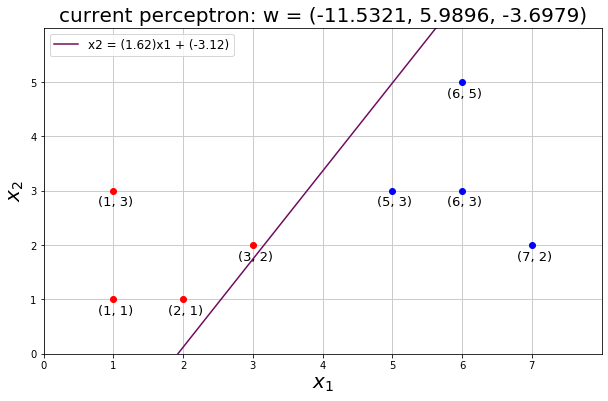

data:[1 1], actual answer:-1, prediction:-1
data:[1 3], actual answer:-1, prediction:-1
data:[2 1], actual answer:-1, prediction:-1
data:[3 2], actual answer:-1, prediction:-1
data:[5 3], actual answer:1, prediction:1
data:[6 3], actual answer:1, prediction:1
data:[6 5], actual answer:1, prediction:1
data:[7 2], actual answer:1, prediction:1


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def answer_comparison(w):
    for i in range(0, len(x)):
        x_i = x[i]
        y_i = y[i]
        answer = predict(w, x_i)
        print(f"data:{x_i[1:]}", end=", ")
        print(f"actual answer:{y_i[0]}", end=", ")
        print(f"prediction:{answer}")

def predict(w, x_i):
    answer = np.dot(w, x_i)
    if answer > 0:
        answer = +1
    elif answer < 0:
        answer = -1
    return answer

def fit(w, x, y):
    is_error_there = True
    while is_error_there:
        is_error_there = False
        for x_i, y_i in zip(x, y):
            answer = predict(w, x_i)
            if answer != y_i:
                w = np.add(w, x_i*y_i)
                is_error_there = True
                draw_coordinates(w, x, y)
                answer_comparison(w)                
    return w

def draw_coordinates(w, x, y):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    plt.axis([0,8,0,6])
    plt.xticks(np.arange(0, 8, 1))
    plt.yticks(np.arange(0, 6, 1))
    plt.grid(color="#CCCCCC", linestyle="-", linewidth=1)
    
    global xy_conc, x1_plus, x1_minus, x2_plus, x2_minus

    plt.scatter(x1_plus, x2_plus, color="blue", zorder=2)
    plt.scatter(x1_minus, x2_minus, color="red", zorder=2)
    
    for i in range(len(x)):
        label = "(" + str(x[i][1]) + ", " + str(x[i][2]) + ")"
        plt.annotate(label, xy=(x[i][1],x[i][2]), xytext=(-15,-15), textcoords='offset points', size=13)

    x_perc = np.arange(0,8,0.1)
    y_perc = -(w[1]/w[2])*x_perc-(w[0]/w[2])*1
    plt.plot(x_perc, y_perc, label=f'x2 = ({-(w[1]/w[2]):0.2f})x1 + ({-(w[0]/w[2])*1:0.2f})', color=np.random.rand(3,), mec="red")
    plt.legend(loc=2, fontsize='large')
    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    global cnt
    if cnt == 0:
        plt.title("Let's train a Perceptron", size=30)
        plt.show()
        time.sleep(1)
        cnt += 1
    else:
        plt.title(f"current perceptron: w = ({w[0]:0.4f}, {w[1]:0.4f}, {w[2]:0.4f})", size=20)
        plt.show()    
                  
x = np.array([[1, 1], [1, 3], [2, 1], [3, 2], [5, 3], [6, 3], [6, 5], [7, 2]])
b = np.ones((x.shape[0], 1), dtype="int")
x = np.concatenate([b, x], axis=1)
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])
y = y.reshape(x.shape[0], 1)
w = np.random.random(x.shape[1])

xy_conc = np.concatenate([x,y],axis=1)
x1_plus = xy_conc[xy_conc[:,3]==1][:,1]
x1_minus = xy_conc[xy_conc[:,3]==-1][:,1]
x2_plus = xy_conc[xy_conc[:,3]==1][:,2]
x2_minus = xy_conc[xy_conc[:,3]==-1][:,2]
cnt = 0

answer_comparison(w)

w = fit(w, x, y)